<a href="https://colab.research.google.com/github/RioDeMilo/Data-analysis-with-python-projects/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import unittest
import matplotlib as mpl
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('/content/fcc-forum-pageviews.csv')


In [ ]:
#!Dont run the code multiple times 
# first i change the index to date and drop the column of the date since the index contains the same value
df['date'] = pd.to_datetime(df['date']) # first of all i passed the date to datetime formazt in pandas 
df = df.rename(columns={'value':'page_views'})
df.index = df['date']# then the index is now the date format
df = df.drop(['date'],axis = 1)# i droped the column date as is now the index


In [2]:
# the above lines of code can be replaced with 
def parse_date(x):
  return datetime.strptime(x, "%Y-%m-%d")
df = pd.read_csv(
    "./fcc-forum-pageviews.csv", # thanks to the dot we can read the file
    index_col=["date"], #now the  index column is date
    parse_dates=["date"], # here we apply the function parse_dates to the data "date"
    date_parser=parse_date,
)    
df = df.loc[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


In [ ]:
df.max() , df.min()

(page_views    1173655
 dtype: int64, page_views    1201
 dtype: int64)

In [ ]:
# be sure to only run one time this line beacuse it will update the values and the quantiles will be normal data if you run it over
#here we al cleaning all te values that are greates than the 97.5 percentile an smaller than the 2.5 percentile
df = df[(df['page_views']<= df['page_views'].quantile(0.975)) & (df['page_views'] >= df['page_views'].quantile(0.025))]



Text(0, 0.5, 'Page Views')

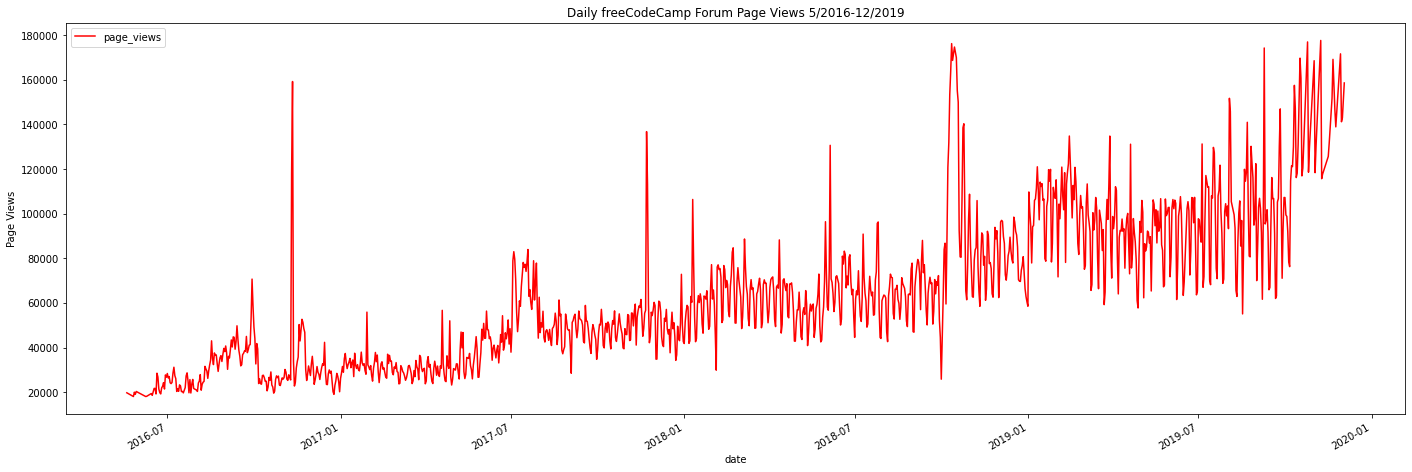

In [ ]:
# this works fine but for  a fucntion we should call the ax to be stored 
df.plot( figsize=(24,8),color = 'Red', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019' )
plt.ylabel('Page Views')

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

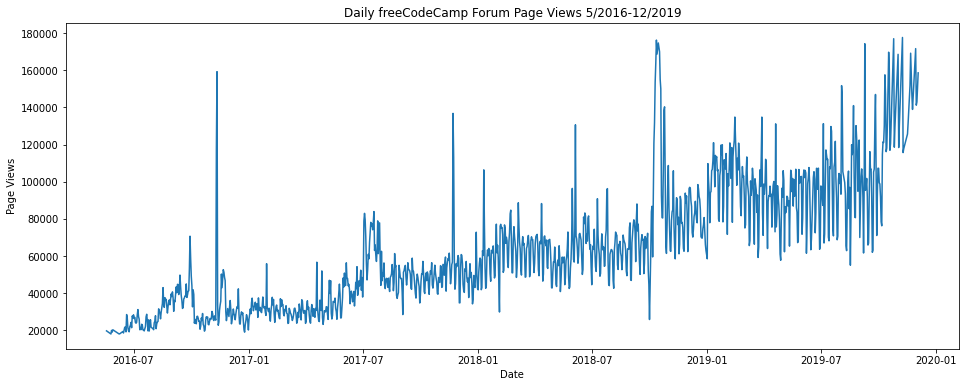

In [ ]:
 # Draw line plot
 # here from subtplot we define the fig an the ax that are two diferrent values 
fig, ax = plt.subplots(figsize=(16, 6)) # thiss saves the fig  in the ax 
ax = sns.lineplot(data=df, x="date", y="page_views")# the ax value i the plotting of the cart
ax.set(
xlabel="Date",
ylabel="Page Views",
)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

In [ ]:
df['Year'] = df.index.year
df['Month']= df.index.month_name()
df

,page_views,Year,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [ ]:
# the list is to give a order to the data set 
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
#we aplied that order and 
df['Month']=pd.Categorical(df['Month'],categories=sort_order)

In [ ]:
# by pivoting the table i get a data saet that is ready to be plotted because in the column i have each month and every row contain each yaer that we want to represent
#also we added the formula of mean to be ready to get the result that we want
df_pivot = pd.pivot_table(
    df,
    values="page_views",
    index="Year",
    columns="Month",
    aggfunc=np.mean
    )


In [ ]:
df_pivot

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Text(0, 0.5, 'Average Page Views')

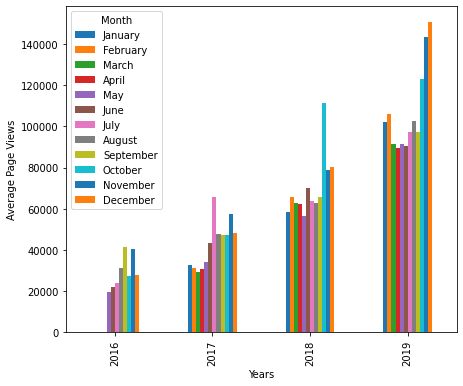

In [ ]:
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

In [ ]:
#here i tried to do somthing similar by diving by periods of time the dataset
x = (df.groupby(pd.PeriodIndex(df['date'], freq="M"))['value'].mean())
x = pd.DataFrame(x)
x.groupby(df['date'].dt.year)['value']

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]    
df_box['month'] = [d.strftime('%b') for d in df_box.date]        
    # Prepare data for box plots (this part is done!)
    

    # Draw box plots (using Seaborn)

In [ ]:
df_box

,date,page_views,Year,Month,year,month
0,2016-05-19,19736,2016,May,2016,May
1,2016-05-26,18060,2016,May,2016,May
2,2016-05-27,19997,2016,May,2016,May
3,2016-05-28,19044,2016,May,2016,May
4,2016-05-29,20325,2016,May,2016,May
...,...,...,...,...,...,...
1233,2019-11-24,138875,2019,November,2019,Nov
1234,2019-11-29,171584,2019,November,2019,Nov
1235,2019-11-30,141161,2019,November,2019,Nov
1236,2019-12-01,142918,2019,December,2019,Dec


NameError: ignored

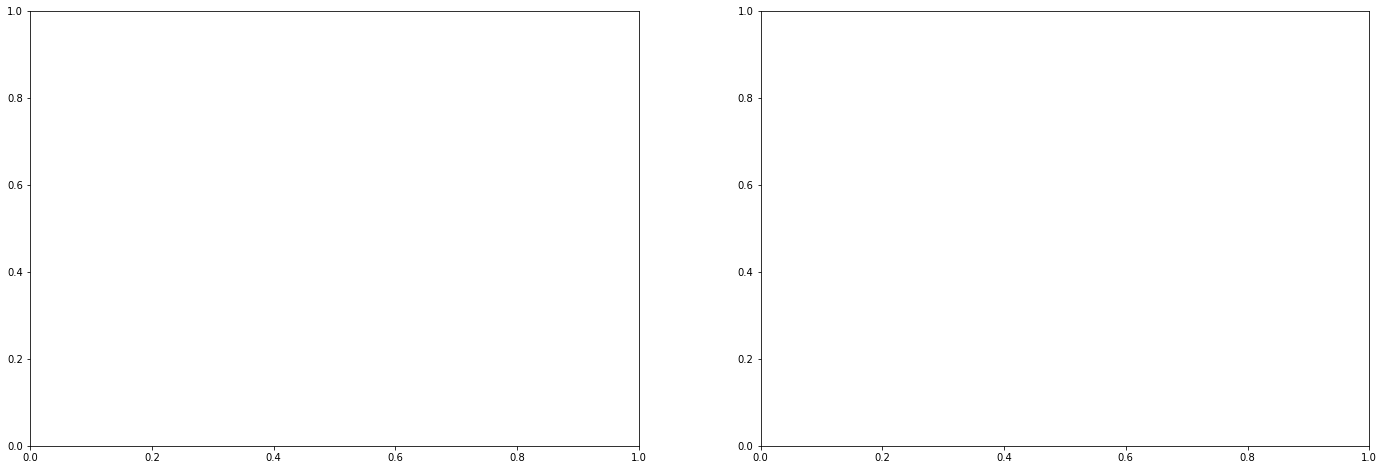

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"])
# Remember to edit the labels after call to seaborn.
ax1.set(
    xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
    )
sns.boxplot(
ax=ax2,        
data=df_box,        
x=df_box["month"],        
y=df_box["page_views"],
) 
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")

    # I'm cheating here, because I don't know why the test for y ticks label
    # fail and I don't want to dig into seaborn source code.
y_ticks = [
    "0",
    "20000",
    "40000",
    "60000",
    "80000",
    "100000",
    "120000",
    "140000",
    "160000",
    "180000",
    "200000",
    ]
ax1.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
ax1.set_yticklabels(y_ticks)

In [5]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().rename(columns={"value": "views"})
    df_box.reset_index(inplace=True)

    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"])

    # Remember to edit the labels after call to seaborn.
    ax1.set(
        xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
    )

    sns.boxplot(
        ax=ax2,
        data=df_box,
        x=df_box["month"],
        y=df_box["views"],
        order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )

    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    fig.savefig('line_plot.png')
    return fig

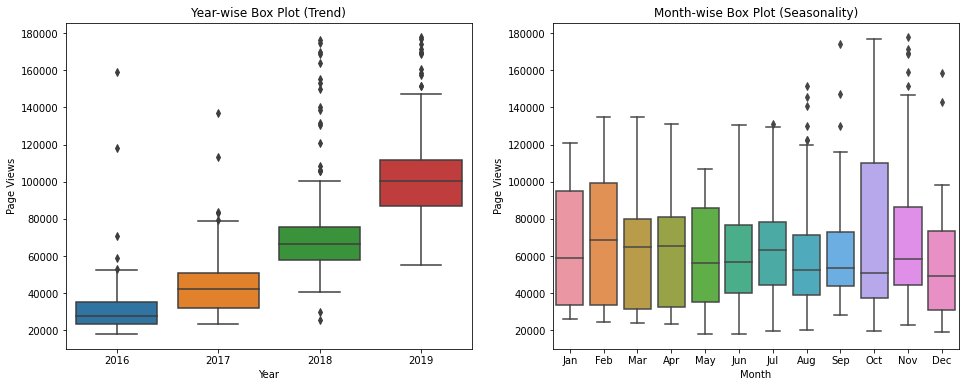

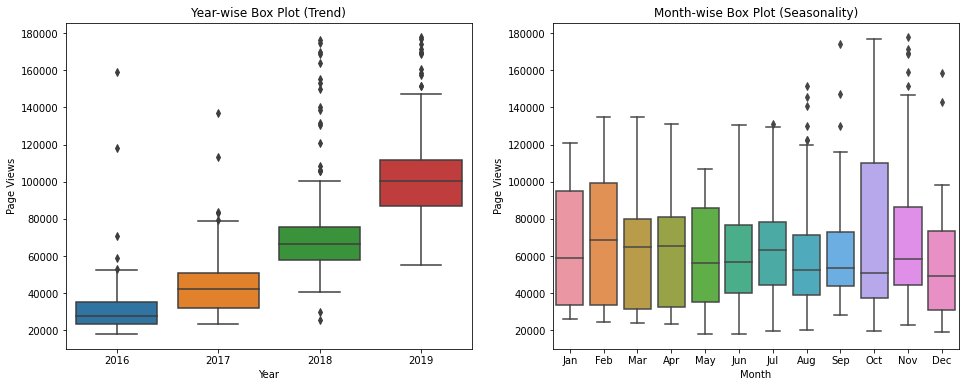

In [6]:
draw_box_plot()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import unittest
import matplotlib as mpl
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
#Dont run the code multiple times
# first i change the index to date and drop the column of the date since the index contains the same value
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date']) # first of all i passed the date to datetime formazt in pandas
df = df.rename(columns={'value':'page_views'})
df.index = df['date']# then the index is now the date format
df = df.drop(['date'],axis = 1)# i droped the column date as is now the index
# Clean data
df = df[(df['page_views'] <= df['page_views'].quantile(0.975)) & (df['page_views'] >= df['page_views'].quantile(0.025))]


def draw_line_plot():
  #Draw line plot
  #here from subtplot we define the fig an the ax that are two diferrent values
  fig, ax = plt.subplots(figsize=(16, 6)) # thiss saves the fig  in the ax
  ax = sns.lineplot(data=df, x="date", y="page_views")# the ax value i the plotting of the cart
  ax.set(
      xlabel="Date",
      ylabel="Page Views",
      )
  ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig


def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['Year'] = df.index.year
    df['Month'] = df.index.month_name()
    # the list is to give a order to the data set
    sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                  'November', 'December']
    # we aplied that order and
    df['Month'] = pd.Categorical(df['Month'], categories=sort_order)
    df_pivot = pd.pivot_table(
        df,
        values="page_views",
        index="Year",
        columns="Month",
        aggfunc=np.mean
    )

    # Draw bar plot
    ax = df_pivot.plot(kind="bar")
    # Get a Matplotlib figure from the axes object for formatting purposes
    fig = ax.get_figure()
    # Change the plot dimensions (width, height)
    fig.set_size_inches(7, 6)
    # Change the axes labels
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().rename(columns={"value": "views"})
    df_box.reset_index(inplace=True)

    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"])

    # Remember to edit the labels after call to seaborn.
    ax1.set(
        xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
    )

    sns.boxplot(
        ax=ax2,
        data=df_box,
        x=df_box["month"],
        y=df_box["views"],
        order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )

    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    fig.savefig('line_plot.png')
    return fig